Self-Driving Car Engineer Nanodegree
Deep Learning
Project: Build a Traffic Sign Recognition Classifier
In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary.
Note: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to \n", "File -> Download as -> HTML (.html). Include the finished document along with this notebook as your submission.
In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a write up template that can be used to guide the writing process. Completing the code template and writeup template will cover all of the rubric points for this project.
The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.
Note: Code and Markdown cells can be executed using the Shift + Enter keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train_big.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 107500
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

22


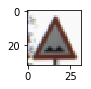

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
def showImage(): 
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])
    
showImage()

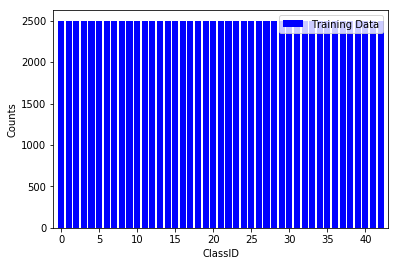

In [4]:
def showDistribution():
    _, training_counts = np.unique(y_train, return_counts = True)
    _, test_counts = np.unique(y_test, return_counts = True)
    plt.bar( np.arange( 43 ), training_counts, align='center',  color='b', label='Training Data')
    #plt.bar( np.arange( 43 ), test_counts, align='center', color='g', label='Testing Data')
    plt.xlabel('ClassID')
    plt.ylabel('Counts')
    plt.xlim([-1, 43])
    plt.legend()
    plt.show()
    
showDistribution()

# Extend Data Set

In [ ]:
# Change the brightness of an image somewhere between 50% and 150%
def change_brightness(img):
    brightness = np.random.uniform(0.5, 1.5)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    img = np.array(img, dtype = np.float64)
    img[:,:,2] = img[:,:,2] * brightness
    # For over-large values, set to 255
    img[:,:,2][img[:,:,2]>255]  = 255
    # Convert back to uint8, then back to RGB
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img

# Apply a translation to an image
def change_translation(img, max_trans):
    rows, cols = img.shape[:2]
    #create a translation matrix, apply to image
    trans_x = np.random.uniform(-max_trans, max_trans)
    trans_y = np.random.uniform(-max_trans, max_trans)
    trans_matrix = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    img_trans = cv2.warpAffine(img, trans_matrix, (cols, rows))
    return img_trans

# Apply an affine transformation to an image
def change_transformation(img, max_trans):
    rows, cols = img.shape[:2]
    # Define the starting point
    pts1 = np.float32([[5, 5], [20, 5], [5, 20]])
    # Calculate the random transformation
    trans_p1 = 5 + np.random.uniform(-max_trans, max_trans)
    trans_p2 = 20 + np.random.uniform(-max_trans, max_trans)
    # Define the end point
    pts2 = np.float32([[trans_p1, 5], [trans_p2, trans_p1], [5, trans_p2]])
    # Calculate and apply the affine transformation matrix
    trans_matrix = cv2.getAffineTransform(pts1, pts2)
    img_trans = cv2.warpAffine(img, trans_matrix, (cols, rows))
    return img_trans

# Apply noise to the image
def add_noise(img, amount):
    num_light = np.ceil(amount * img.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_light))
              for i in image.shape]
    img[coords] = 1

    num_dark = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_dark))
          for i in image.shape]
    img[coords] = 0

    # Return image
    return img

Use the methods above to get up to 2000 samples per class in the training set. This takes ages - only do it once, then save the data for future use. 

In [ ]:
import cv2

# Store the extended training dataset here
X_train_big = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = X_train.dtype)
y_train_big = np.empty([0], dtype = y_train.dtype)

# Position marker
pos = 0

# New class size
class_size_n = 2500

# Get counts per class
_, class_counts = np.unique(y_train, return_counts = True)

# Go through all possible classes and generate additional samples
for c in range(n_classes):
    # First copy existing data for this class
    X_train_big = np.append(X_train_big, X_train[y_train == c], axis = 0)
    y_train_big = np.append(y_train_big, y_train[y_train == c], axis = 0)
    copied = len(X_train[y_train == c])
    print('Class size is {}'.format(class_size_n))
    print('Class count is {}'.format(class_counts[c]))
    # Generate so many samples, that we have 2500 samples at the end per class
    for i in range(class_size_n - class_counts[c]):
        # Pick a random image from that class
        number = np.random.randint(pos, pos + copied)
        image = np.copy(X_train_big[number])
        
        # Apply one of those four image augmentations randomly
        if (i % 4) == 0:
            image = change_brightness(image)
        elif (i % 4) == 1:
            image = change_translation(image, 4)
        elif (i % 4) == 2:
            image = change_transformation(image, 2)
        else:
            image = add_noise(image, 0.01)
            
        # Reshape the image
        image = image.reshape(1, 32, 32, 3)
        
        # Add augmented image to the end of the array
        y_train_big = np.append(y_train_big, [c])
        X_train_big = np.append(X_train_big, image, axis = 0)
        
        
    # Copy current label
    #y_train_big = np.append(y_train_big, np.full(len(X_train_big), c, dtype = int))
        
    # Raise position marker
    pos += class_size_n
    #print(len(y_train_big))
    #print(len(X_train_big))
    assert(len(X_train_big) == len(y_train_big))
    
    # Shows message
    print("Finished class {}!".format(c))
    
print("Data augmentation finished!")

In [ ]:
assert(len(X_train_big) == len(y_train_big))
import os
      
pickle_file = 'traffic-signs-data/train_big.p'
if os.path.isfile(pickle_file):
    print('Saving extended training data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'features': X_train_big,
                    'labels': y_train_big
                },
                pfile, 2)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Extended data training set saved in pickle file!')
length = len(X_train_big)
print('Pickle file has {} samples!'.format(length))
assert(len(X_train_big) == len(y_train_big))


# Revisualize Data
Load the file, visualize a picture and show the distribution of the data again, to make sure it's now looking right. 

In [ ]:
pickle_file = 'traffic-signs-data/train_big.p'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  X_train = pickle_data['features']
  y_train = pickle_data['labels']
  #del pickle_data  # Free up memory

n_train = len(y_train)
print('Extended data training set with {} samples loaded'.format(n_train))

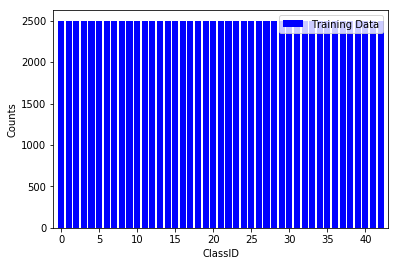

In [5]:
showDistribution()
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from skimage import exposure, img_as_uint, data, img_as_ubyte, img_as_float
from sklearn.utils import shuffle

for image in X_train: 
    adapted = exposure.equalize_adapthist(image)
    image = exposure.rescale_intensity(adapted) 

/Users/helenherring/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/helenherring/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/exposure/exposure.py:307: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import cv2

def convertToGray(image_data):
    image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2GRAY)
    return image_data

#X_train = np.array([convertToGray(X_train[i]) for i in range(len(X_train))])
#X_valid = np.array([convertToGray(X_valid[i]) for i in range(len(X_valid))])
#X_test = np.array([convertToGray(X_test[i]) for i in range(len(X_test))])


print("Images converted to grayscale!")


    
X_train, y_train = shuffle(X_train, y_train)

Images converted to grayscale!


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [8]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128
keep_prob = 0.5
learn_rate = 0.001

# Run mode, set to test later
run_mode = "TRAIN"

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [18]:

print("Image data shape =", image_shape)

Image data shape = (32, 32, 3)


In [30]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
        
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32   
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation and dropout. 
    conv1 = tf.nn.relu(conv1)
    if run_mode is "TRAIN":
        conv1 = tf.nn.dropout(conv1, keep_prob)
        
        
    print("Made it through conv1!")
        
    # Layer 2: 2nd Convolutional. Output: 28x28x6
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation, pooling and dropout. Output = 14x14x64
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    if run_mode is "TRAIN":
        conv2 = tf.nn.dropout(conv2, keep_prob)
        
    print("Made it through conv2!")
    
    # Layer 3: 3rd Convolutional.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
        
    # Activation, pooling and dropout. 
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    if run_mode is "TRAIN":
        conv3 = tf.nn.dropout(conv3, keep_prob)
    print("Made it through conv3!")
        
    # Flatten. 
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected with activation and dropout. 
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2304, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    if run_mode is "TRAIN":
        fc1 = tf.nn.dropout(fc1, keep_prob)
        
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    print("Made it through fc1!")

    # Layer 5: Fully Connected with activation and dropout. 
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    if run_mode is "TRAIN":
        fc2 = tf.nn.dropout(fc2, keep_prob)
    fc2    = tf.nn.relu(fc2)
    
    print("Made it through fc2!")
    
    # Layer 6: Fully Connected. 
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print("Made it through fc3!")
        
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [31]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

h_fc1_drop = tf.nn.dropout(x, keep_prob)
one_hot_y = tf.one_hot(y, 43)
rate = learn_rate

# Get  logits from neural network
logits = LeNet(x)
print("Run through modified LeNet is completed!")

# Calculate cross entropy from logits and one-hot labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# Calculate training loss
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

print("Made it through cross entropy and training loss calculation!")

# Define the training operation - minimize the optimizer
training_operation = optimizer.minimize(loss_operation)



# Stuff for evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

print("Made it through the supporting pieces for evaluation!")

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    print("Made it through the evaluation function!")
    return total_accuracy / num_examples

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
epoch_log = []
loss_epoch = []
train_acc_epoch = []
valid_acc_epoch = []

print("Made it through the full training pipeline!")




Made it through conv1!
Made it through conv2!
Made it through conv3!
Made it through fc1!
Made it through fc2!
Made it through fc3!
Run through modified LeNet is completed!
Made it through cross entropy and training loss calculation!
Made it through the supporting pieces for evaluation!
Made it through the full training pipeline!


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [33]:
### Run session
import math

with tf.Session() as session:
    
    # Init the weights and biases
    session.run(tf.global_variables_initializer())
    
    # Calculate the number of batches per epoch
    batch_count = int(math.ceil(n_train / BATCH_SIZE))

    print("Training {} epochs with {} batches/epoch and {} samples/batch".format(EPOCHS, batch_count, BATCH_SIZE))
    print()
    
    # Go through the single epochs
    for epoch_n in range(EPOCHS):
        
        # Shuffle training data every epoch
        X_train, y_train = shuffle(X_train, y_train)
        
        # Go through the batches
        for offset in range(0, n_train, BATCH_SIZE):
            
            # Load a new batch of data
            batch_x, batch_y = X_train[offset : offset+BATCH_SIZE], y_train[offset : offset+BATCH_SIZE]
            
            # Run training operation
            _, l = session.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
            
        # Show training and validation accuracy for every epoch
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {}:".format(epoch_n))
        print("Training accuracy = {:.3f}".format(training_accuracy))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        
         # Log epochs
        previous_epoch = epoch_log[-1] if epoch_log else 0
        epoch_log.append(1 + previous_epoch)
        loss_epoch.append(l)
        train_acc_epoch.append(training_accuracy)
        valid_acc_epoch.append(validation_accuracy)
        
    # Save the model 
    saver.save(session, saver_file)
    print()
    print("Model saved into {}".format(saver_file))

Training 100 epochs with 840 batches/epoch and 128 samples/batch

Made it through the evaluation function!
Made it through the evaluation function!
EPOCH 0:
Training accuracy = 0.024
Validation accuracy = 0.015
Made it through the evaluation function!
Made it through the evaluation function!
EPOCH 1:
Training accuracy = 0.024
Validation accuracy = 0.015
Made it through the evaluation function!
Made it through the evaluation function!
EPOCH 2:
Training accuracy = 0.024
Validation accuracy = 0.013
Made it through the evaluation function!
Made it through the evaluation function!
EPOCH 3:
Training accuracy = 0.025
Validation accuracy = 0.048
Made it through the evaluation function!
Made it through the evaluation function!
EPOCH 4:
Training accuracy = 0.046
Validation accuracy = 0.075
Made it through the evaluation function!
Made it through the evaluation function!
EPOCH 5:
Training accuracy = 0.061
Validation accuracy = 0.069
Made it through the evaluation function!
Made it through the eva

NameError: name 'saver_file' is not defined

Step 3: Test a Model on New Images
To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.
You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Output Top 5 Softmax Probabilities For Each Image Found on the Web
For each of the new images, print out the model's softmax probabilities to show the certainty of the model's predictions (limit the output to the top 5 probabilities for each image). tf.nn.top_k could prove helpful here.
The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.
tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.
Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. tk.nn.top_k is used to choose the three classes with the highest probability:
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
Running it through sess.run(tf.nn.top_k(tf.constant(a), k=3)) produces:
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
Looking just at the first row we get [ 0.34763842,  0.24879643,  0.12789202], you can confirm these are the 3 largest probabilities in a. You'll also notice [3, 0, 5] are the corresponding indices.
In [3]:


In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))